# Predicción de precios de propiedades

En este proyecto vamos a seguir trabajando con el dataset de propiedades en venta publicadas en el portal [Properati](www.properati.com.ar). El objetivo en este caso armar nuestros primeros modelos para predecir el precio de las propiedades en dólares.

Las columnas que se agregan son:

* `barrios_match`: si coincide el barrio publicado con el geográfico vale 1, si no 0.

* `PH`, `apartment`, `house`: variables binarias que indican el tipo de propiedad.

* dummies de barrios: variables binarias con 1 o 0 según el barrio.

La métrica que vamos a usar para medir es RMSE (raíz del error cuadrático medio), cuya fórmula es:

$$RMSE = \sqrt{\frac{\sum_{t=1}^n (\hat y_t - y_t)^2}{n}}$$

In [2]:
import pandas as pd
import numpy as np
pd.set_option('display.float_format', lambda x: '%.3f' % x)
path_dataset = 'dataset/datos_properati_limpios_model.csv'
df = pd.read_csv(path_dataset)

In [3]:
print("El dataset que vamos a trabajar aquí tiene {} observaciones".format(df.shape[0]))

El dataset que vamos a trabajar aquí tiene 6376 observaciones


In [4]:
df.head()

,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,rooms,barrio_match,PH,apartment,house,...,VILLA LUGANO,VILLA LURO,VILLA ORTUZAR,VILLA PUEYRREDON,VILLA REAL,VILLA RIACHUELO,VILLA SANTA RITA,VILLA SOLDATI,VILLA URQUIZA,outlier_price_m2
0,-34.589,-58.417,170000.000,40.000,38.000,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,-34.591,-58.418,90000.000,27.000,27.000,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,-34.587,-58.437,150000.000,44.000,44.000,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,-34.593,-58.428,154000.000,58.000,58.000,2,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-34.593,-58.428,154000.000,58.000,58.000,3,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


El objetivo de este proyecto es poder trabajar en el ajuste de modelos y su posterior evaluación.

Para empezar vamos a separar el `dataset` en un conjunto de entrenamiento (80%) y un conjunto de test (20%). 

In [5]:
X = df.drop(['price_aprox_usd'], axis=1)
y = df['price_aprox_usd']

In [6]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test= train_test_split(X, y, test_size=0.2)

In [7]:
X_train.describe()

,lat,lon,surface_total_in_m2,surface_covered_in_m2,rooms,barrio_match,PH,apartment,house,AGRONOMIA,...,VILLA LUGANO,VILLA LURO,VILLA ORTUZAR,VILLA PUEYRREDON,VILLA REAL,VILLA RIACHUELO,VILLA SANTA RITA,VILLA SOLDATI,VILLA URQUIZA,outlier_price_m2
count,5100.000,5100.000,5100.000,5100.000,5100.000,5100.000,5100.000,5100.000,5100.000,5100.000,...,5100.000,5100.000,5100.000,5100.000,5100.000,5100.000,5100.000,5100.000,5100.000,5100.000
mean,-34.605,-58.438,65.492,55.783,2.317,0.691,0.097,0.879,0.024,0.004,...,0.009,0.014,0.009,0.012,0.004,0.001,0.007,0.001,0.031,0.000
std,0.026,0.041,205.287,153.704,0.944,0.462,0.296,0.326,0.153,0.061,...,0.094,0.116,0.094,0.110,0.059,0.034,0.083,0.031,0.174,0.000
min,-34.695,-58.529,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,-34.624,-58.470,40.000,36.000,2.000,0.000,0.000,1.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,-34.606,-58.437,51.000,45.000,2.000,1.000,0.000,1.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,-34.590,-58.404,70.000,60.000,3.000,1.000,0.000,1.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
max,-34.536,-58.353,7781.000,5780.000,10.000,1.000,1.000,1.000,1.000,1.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.000


In [8]:
X_test.shape

(1276, 58)

In [9]:
X_train.shape

(5100, 58)

## Árboles de decisión

Lo primero que vamos a hacer es entrenar un árbol de decisión y usar de métrica al `RMSE`. 

Para poder obtener el **RMSE** vamos a medir el `mean_squared_error` y obtener su raíz cuadrada.


In [10]:
# En esta celda cargá el regresor y realizá el entrenamiento
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
tree.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

Con el modelo entrenado **realizá la predicción** sobre el conjunto de test `X_test` y guardá el resultado en una variable `y_pred`.

In [11]:

y_pred=tree.predict(X_test)

In [44]:
from sklearn.metrics import mean_squared_error
mse = np.sqrt(mean_squared_error(y_test,y_pred))
print('Mean Squared Error Decision Tree:',mse)

Mean Squared Error Decision Tree: 25956.296686487116


In [203]:
rmses_train = []
rmses_test = []
profundidad = np.arange(1,40,5)

for max_depth in profundidad:
    tree = DecisionTreeRegressor(max_depth=max_depth,random_state=42)
    tree.fit(X_train, y_train)
    
    y_pred_train = tree.predict(X_train)
    y_pred_test = tree.predict(X_test)
    
    print("max depth = {}".format(max_depth))
    
    train_mse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    test_mse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    
    rmses_train.append(train_mse)
    rmses_test.append(test_mse)
       
    print("Train MSE: {}".format(train_mse))
    print("Test MSE: {}".format(test_mse))
    
rmses_train= np.array(rmses_train)
rmses_test= np.array(rmses_test)


max depth = 1
Train MSE: 26579.15123116968
Test MSE: 27238.86967040479
max depth = 6
Train MSE: 20109.986320894575
Test MSE: 22526.854754410742
max depth = 11
Train MSE: 13857.189865352742
Test MSE: 23023.03172427959
max depth = 16
Train MSE: 7243.743733232561
Test MSE: 24938.405010463026
max depth = 21
Train MSE: 2897.860680351482
Test MSE: 25508.2545911456
max depth = 26
Train MSE: 596.0229465650931
Test MSE: 25692.31205022971
max depth = 31
Train MSE: 498.0483430613376
Test MSE: 26059.656001922554
max depth = 36
Train MSE: 498.0483430613376
Test MSE: 26059.656001922554


Ahora graficamos los valores que guardamos en los arreglos `rmses_train` y `rmses_test`

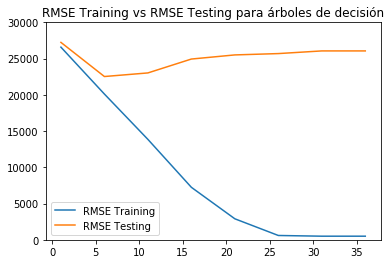

In [204]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.plot(range(1,40,5), rmses_train, label='RMSE Training')
plt.plot(range(1,40,5), rmses_test, label='RMSE Testing')
plt.ylim((0, 30000))
plt.legend(loc="best")
plt.title("RMSE Training vs RMSE Testing para árboles de decisión")
plt.show()

Podemos ver aquí como el modelo presenta sobreajuste dado que a mayor complejidad (en este caso, mayor profundidad del árbol) más diferencia entre los resultados de training y testing. También observamos como la curva de testing decrece y luego vuelvo a crecer. El punto donde se minimiza está relacionado con el tradeoff entre sesgo y varianza que vamos a ver en la próxima unidad.

## KNN

In [151]:
# Realizá el entrenamiento y el cálculo de rmse en esta celda
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [137]:
y_pred=knn.predict(X_test)

In [138]:
from sklearn.metrics import mean_squared_error
mse = np.sqrt(mean_squared_error(y_test,y_pred))
print('Mean Squared Error Test KNN:',mse)

Mean Squared Error Test KNN: 23566.91070788747


__Analizar el cambio en el RMSE a medida que consideramos más vecinos para KNN, tanto en training como en testing.__

In [215]:
rmses_train = []
rmses_test = []
neighbors = np.arange(1,40,5)

for n_neighbors in neighbors:
    mse = KNeighborsRegressor(n_neighbors=n_neighbors)
    mse.fit(X_train, y_train)
    
    y_pred_train = mse.predict(X_train)
    y_pred_test = mse.predict(X_test)
    
    print("n_neighbor = {}".format(n_neighbors))
    
    train_mse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    test_mse =  np.sqrt(mean_squared_error(y_test, y_pred_test))
    
    rmses_train.append(train_mse)
    rmses_test.append(test_mse)
    
    print("Train MSE: {}".format(train_mse))
    print("Test MSE: {}".format(test_mse))
    
rmses_train = np.array(rmses_train)
rmses_test = np.array(rmses_test)




n_neighbor = 1
Train MSE: 677.0281491237143
Test MSE: 27656.11022826134
n_neighbor = 6
Train MSE: 19091.099886822307
Test MSE: 23353.956501076253
n_neighbor = 11
Train MSE: 20695.51946356444
Test MSE: 23375.1379656933
n_neighbor = 16
Train MSE: 21413.798071968842
Test MSE: 23449.898719718538
n_neighbor = 21
Train MSE: 21892.010613576018
Test MSE: 23537.299091187953
n_neighbor = 26
Train MSE: 22236.021381120787
Test MSE: 23717.732363746578
n_neighbor = 31
Train MSE: 22492.346110470404
Test MSE: 23736.934969163154
n_neighbor = 36
Train MSE: 22629.436125296786
Test MSE: 23896.792533991516


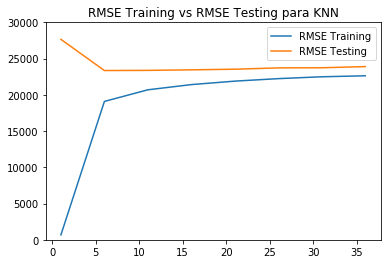

In [209]:
plt.plot(range(1,40,5), rmses_train, label='RMSE Training')
plt.plot(range(1,40,5), rmses_test, label='RMSE Testing')
plt.ylim((0, 30000))
plt.legend(loc="best")
plt.title("RMSE Training vs RMSE Testing para KNN")
plt.show()

In [210]:
def nmsq2rmse(score):
    return np.sqrt(-score)

In [211]:

from sklearn.model_selection import cross_val_score
regressor = DecisionTreeRegressor(max_depth = 5)
scores = cross_val_score(regressor, X_train, y_train,
                             scoring="neg_mean_squared_error", cv=10)


Para ver el resultado final, reentrenamos al regresor y mostramos en un dataframe la comparación entre los valores reales, los predichos y su diferencia

In [212]:
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
val_real = pd.Series(y_test.values)
val_pred = pd.Series(y_pred)

In [213]:
predicciones = pd.concat([val_real.rename('Valor real'),val_pred.rename('Valor Pred') ,abs(val_real-val_pred).rename('Dif(+/-)')] ,  axis=1)

In [214]:
predicciones.head(10)

,Valor real,Valor Pred,Dif(+/-)
0,135000.000,114510.775,20489.225
1,155000.000,126165.143,28834.857
2,129500.000,138454.397,8954.397
3,130000.000,135051.535,5051.535
4,73000.000,78399.899,5399.899
5,92000.000,126165.143,34165.143
6,148000.000,138454.397,9545.603
7,85000.000,135051.535,50051.535
8,89000.000,124759.507,35759.507
9,139800.000,124759.507,15040.493
